In [21]:
from keras import applications
# python image_scraper.py  "yellow labrador retriever" --count 500 --label labrador
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras_tqdm import TQDMNotebookCallback


from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import (Dropout, Flatten, Dense, Conv2D, 
                          Activation, MaxPooling2D)

from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os, glob
from tqdm import tqdm
from collections import Counter
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [22]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
# import tensorflow as tf

In [35]:
new_model = keras.models.load_model('final_1.hdf5')

In [31]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 32)     

In [18]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [33]:
new_model.compile()

In [29]:
# new_modecompilel.('tensorflow.python.keras.layers.core.Dense at 0x1bbe08f0708')

In [36]:
# # from tf.keras.models import Model

# # Generator for our similarity work
# sim_gen = test_datagen.flow_from_directory(
#     'Animal/',
#     target_size=(512, 512),
#     batch_size=32, shuffle=False,
#     class_mode='categorical')

# layer_name = 'dense_1'
# intermediate_layer_model = Model(inputs=new_model.input,
#                                  outputs=new_model.get_layer(layer_name).output)

# intermediate_output = intermediate_layer_model.predict_generator(generator=sim_gen, steps=4455)

In [38]:
cosine = np.load('sim_val.npy')

In [39]:
type(cosine)

numpy.ndarray

In [40]:
cosine.shape

(4455, 4455)

In [41]:
def load_an_image2(file_name):
    _img = image.load_img(

        os.path.join(os.getcwd() + '\\Animal\\',  file_name)
       , 
        target_size=(256, 256)

    )
    return _img

In [42]:
sim_gen = test_datagen.flow_from_directory(
    'Animal/',
    target_size=(512, 512),
    batch_size=1, shuffle=False,
    class_mode='categorical')

Found 4456 images belonging to 7 classes.


In [43]:
def similar_image(li,pred_val):
    res = []
    for i,val in enumerate(li):
        if val > 0.9:
            res.append(pred_val[i])
    return res

In [44]:
li = sorted(cosine[66])[::-1]
pred_value = np.argsort(cosine[66])[::-1]

In [45]:
resulted_image = similar_image(li,pred_value)

In [46]:
len(resulted_image)

68

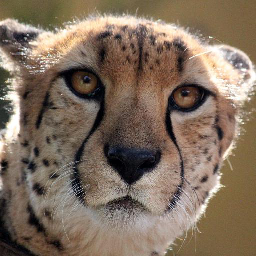

In [47]:
load_an_image2(sim_gen.filenames[66])

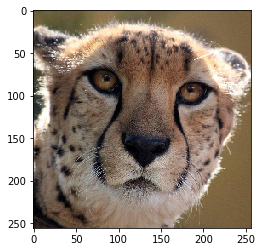

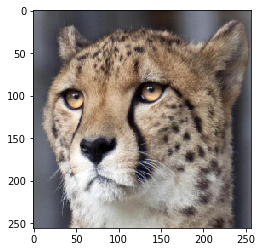

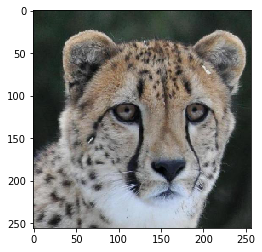

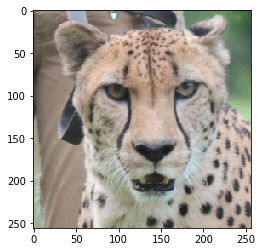

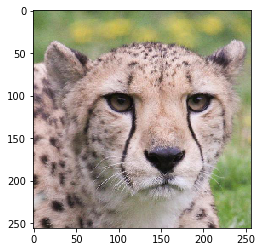

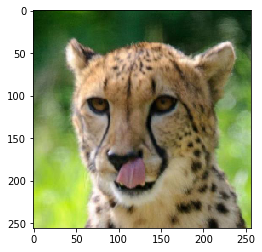

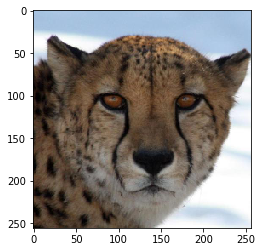

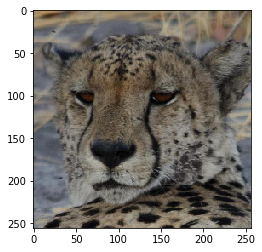

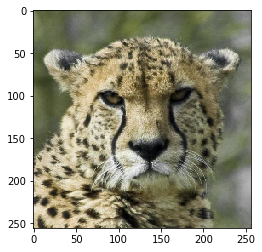

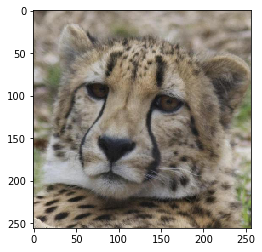

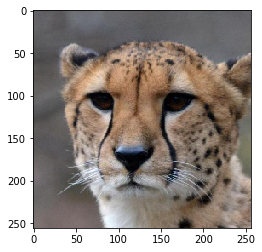

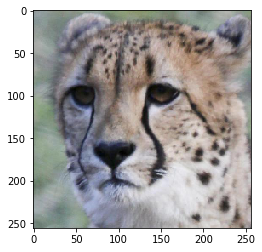

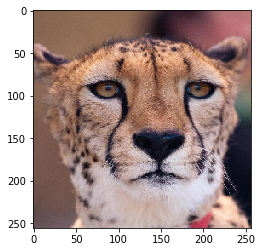

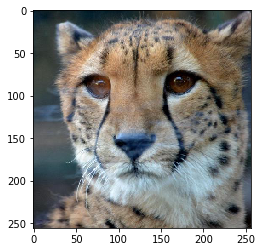

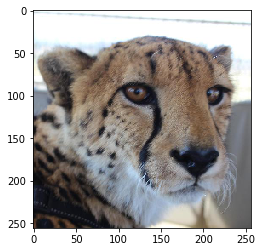

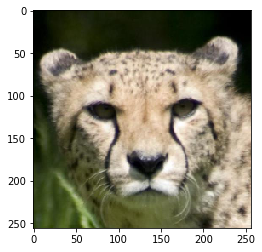

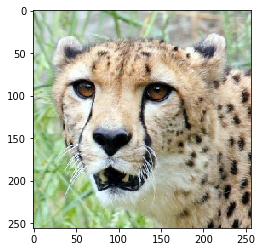

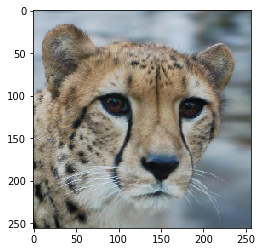

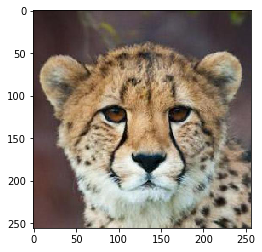

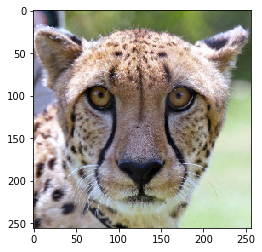

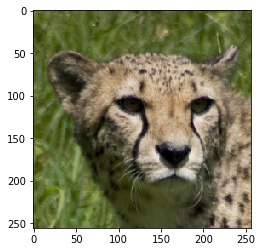

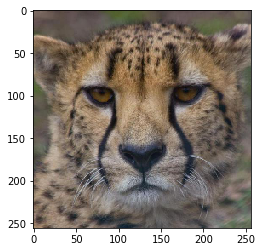

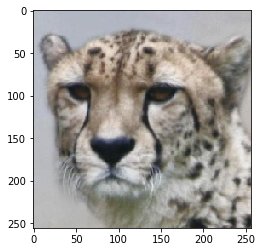

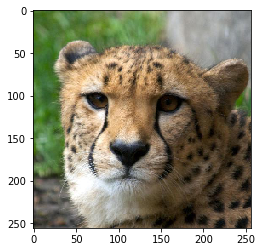

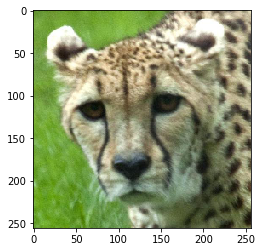

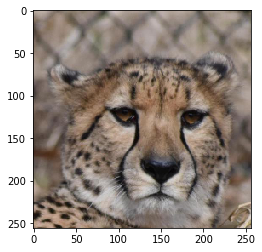

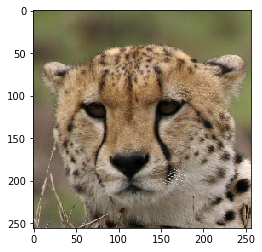

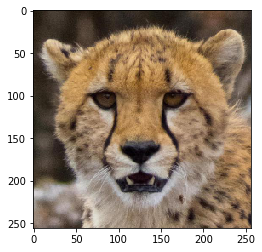

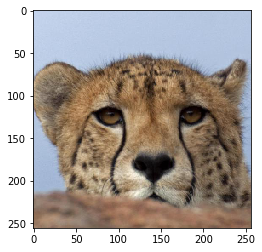

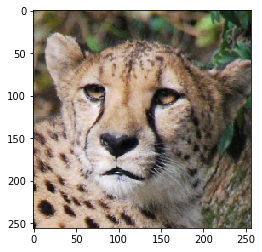

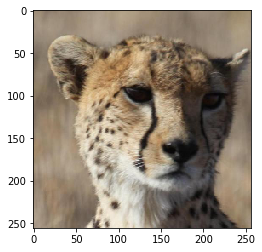

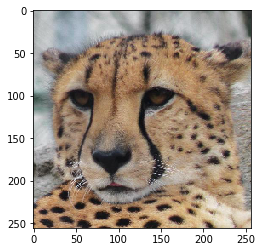

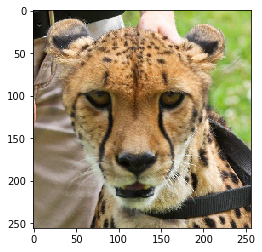

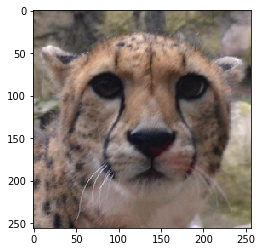

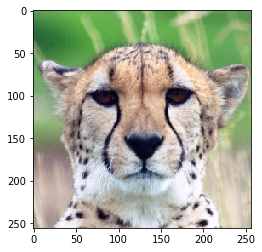

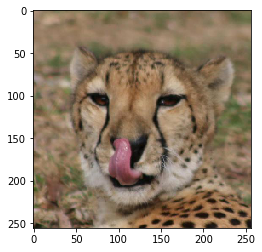

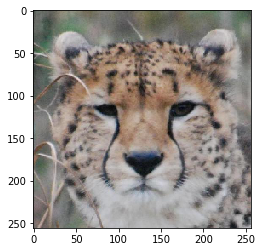

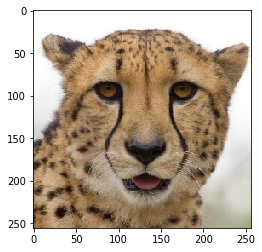

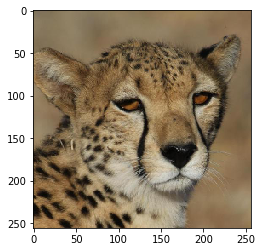

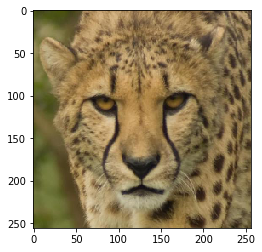

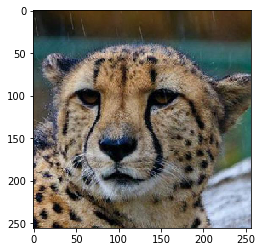

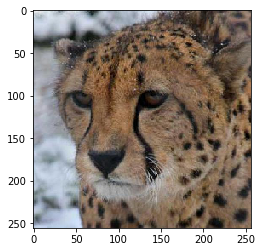

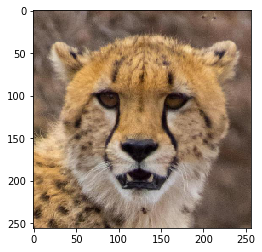

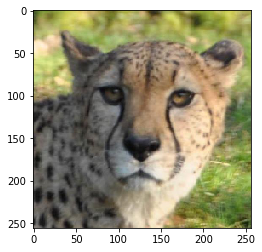

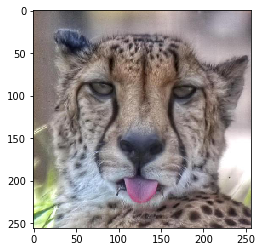

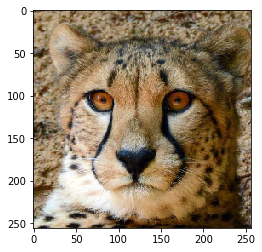

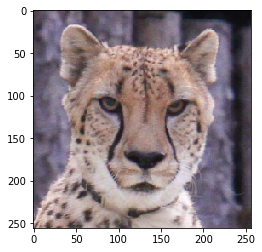

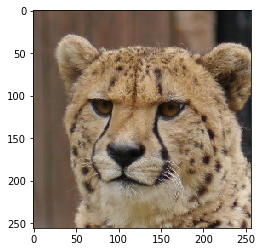

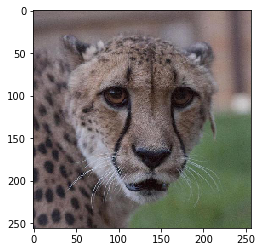

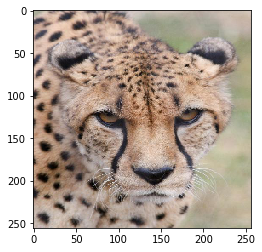

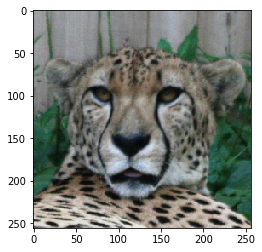

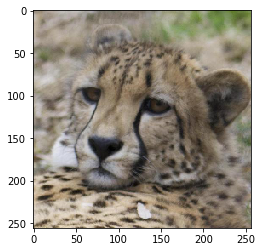

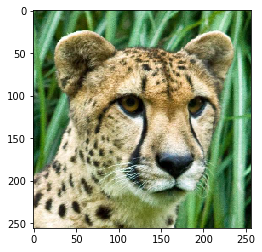

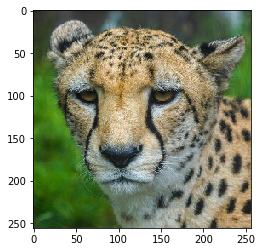

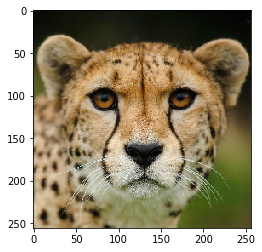

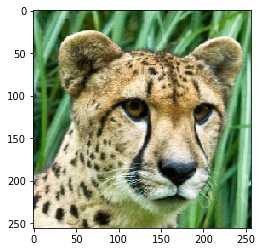

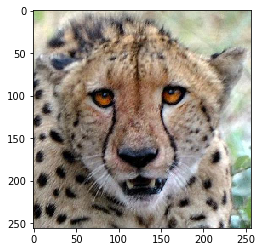

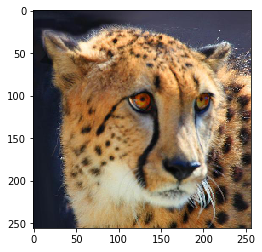

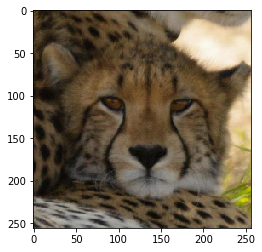

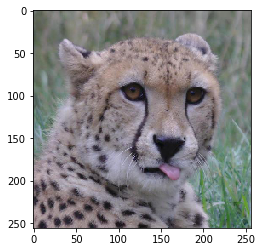

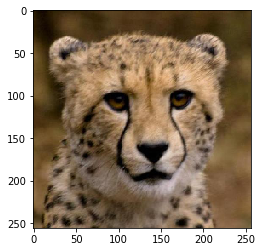

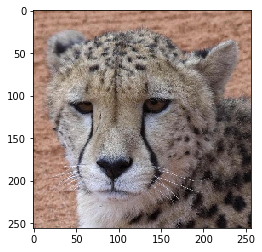

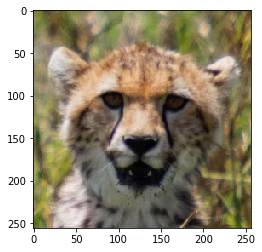

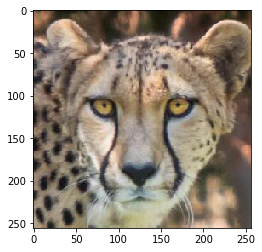

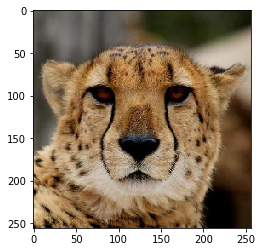

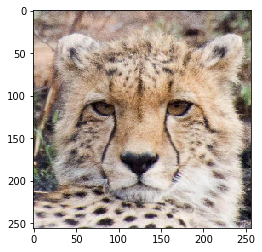

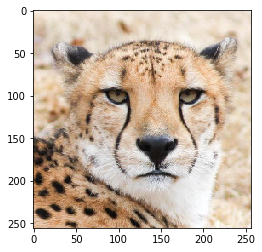

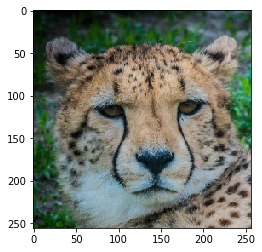

68


In [48]:
ims = [load_an_image2(sim_gen.filenames[x]) for x in resulted_image]
count = 0
for i in ims:
    plt.imshow(i)
    plt.show()
    count += 1
print(count)